#  Loading Libraries

In [225]:
import numpy as np                  # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')    # Ignore warning related to pandas_profiling

In [226]:
ls

 deliveries.csv   ipldata.zip   IPL.ipynb  'IPL P.ipynb'   matches.csv


# Data Mining

In [227]:
matches_data = pd.read_csv('matches.csv')

In [228]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# -Exploratory data Analysis

In [229]:
matches_data.shape

(696, 18)

 there are 696 rows and 18 columns in dataset

In [230]:
matches_data.count()

id                 696
season             696
city               689
date               696
team1              696
team2              696
toss_winner        696
toss_decision      696
result             696
dl_applied         696
winner             693
win_by_runs        696
win_by_wickets     696
player_of_match    693
venue              696
umpire1            695
umpire2            695
umpire3             60
dtype: int64

In [231]:
matches_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [232]:
matches_data.describe(include='object')

,city,date,team1,team2,toss_winner,toss_decision,result,winner,player_of_match,venue,umpire1,umpire2,umpire3
count,689,696,696,696,696,696,696,693,693,696,695,695,60
unique,32,498,14,14,14,2,3,14,214,35,55,58,18
top,Mumbai,2009-04-23,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,Mumbai Indians,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,94,2,91,90,90,413,686,98,20,73,73,56,6


In [233]:
matches_data.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [234]:
matches_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [235]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


# Missing Values

In [236]:
matches_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [237]:
matches_data.drop('umpire3',axis=True,inplace=True)   #dropped the umpire3 column as thr are huge missing values

In [238]:
matches_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [239]:
matches_data.shape

(696, 17)

In [240]:
matches_data['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

from the above in city column replacing Bangalore with benagalure

In [241]:
matches_data.replace('Bengaluru','Bangalore',inplace = True)
matches_data['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali'], dtype=object)

In [242]:
matches_data['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants'],
      dtype=object)

Rising Pune Supergiants is having 2 teams with different names 
  (Rising Pune Supergiants and Rising Pune Supergiant) 
  replacing all values with same name Rising Pune Supergiants

In [102]:
matches_data.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace = True)
matches_data['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan], dtype=object)

In [105]:
matches_data.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

Replacing Null values in CITY column from VENUE

In [126]:
matches_data['city'].fillna(matches_data['venue'].apply(lambda x: x[:5]),inplace = True)
matches_data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [125]:
matches_data[matches_data['winner'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


 no result these columns would be left blank and no need to replace with any values.

In [127]:
matches_data[matches_data['player_of_match'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


there is no result  and winner and player of the match , so wil neglect these

In [128]:
matches_data.shape

(696, 17)

# Questions ?

# 1 total how many matches held ?

In [132]:
matches_data['id'].count()

696

total 696 IPL matches held

# 2. Total How many Seasons held ?

In [133]:
seasons = matches_data['season'].unique()
seasons.sort()
print(seasons)

print("total how many seasons held:",len(seasons))

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
total how many seasons held: 11


# 3. Number of matches held seasonwise ?

In [138]:
matches_data.groupby('season')['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
Name: id, dtype: int64

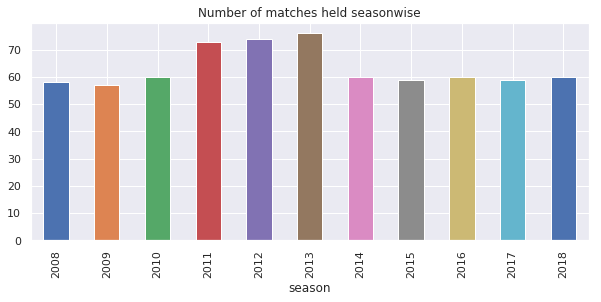

In [159]:
mat = matches_data.groupby('season')['id'].count()                 #graphical representation
mat.plot(kind='bar',title= "Number of matches held seasonwise",figsize=(10,4))

# 4. Total matches played by each team ?

In [152]:
total_played = matches_data['team1'].value_counts() + matches_data['team2'].value_counts()
total_played

Chennai Super Kings            147
Deccan Chargers                 75
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                162
Kochi Tuskers Kerala            14
Kolkata Knight Riders          164
Mumbai Indians                 171
Pune Warriors                   46
Rajasthan Royals               133
Rising Pune Supergiants         30
Royal Challengers Bangalore    166
Sunrisers Hyderabad             93
dtype: int64

# 5. No of matches won by each team ?

In [153]:
total_won = matches_data['winner'].value_counts() 
total_won

Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Kings XI Punjab                76
Rajasthan Royals               70
Delhi Daredevils               67
Sunrisers Hyderabad            52
Deccan Chargers                29
Rising Pune Supergiants        15
Gujarat Lions                  13
Pune Warriors                  12
Kochi Tuskers Kerala            6
Name: winner, dtype: int64

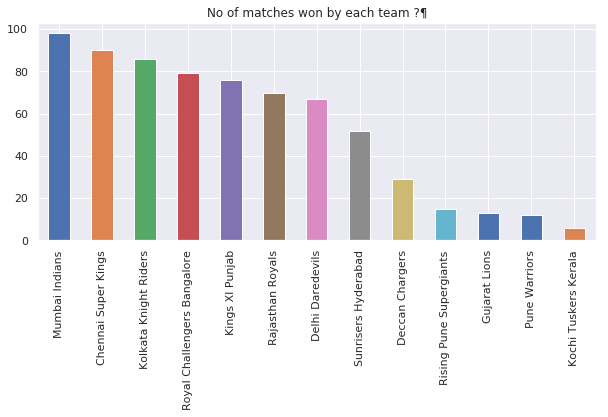

In [178]:
 total_won = matches_data['winner'].value_counts()   #graphical representation
total_won.plot(kind = 'bar', title="No of matches won by each team ?¶",figsize = (10,4))

# 6.No of matches won by each team in each season ?

In [165]:
won_season = matches_data.groupby('season')['winner'].value_counts()
won_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                

# 7. Comparision between Total matches played and No of matches won by each team ?

In [183]:
#total matches played
total_played = matches_data['team1'].value_counts() + matches_data['team2'].value_counts()
# total won
total_won = matches_data.groupby('winner').count() 

total_won['total_played']= total_played
comparision = total_won[['total_played','result']].sort_values(by='total_played',ascending= False)

comparision

,total_played,result
winner,,
Mumbai Indians,171,98
Royal Challengers Bangalore,166,79
Kolkata Knight Riders,164,86
Kings XI Punjab,162,76
Delhi Daredevils,161,67
Chennai Super Kings,147,90
Rajasthan Royals,133,70
Sunrisers Hyderabad,93,52
Deccan Chargers,75,29


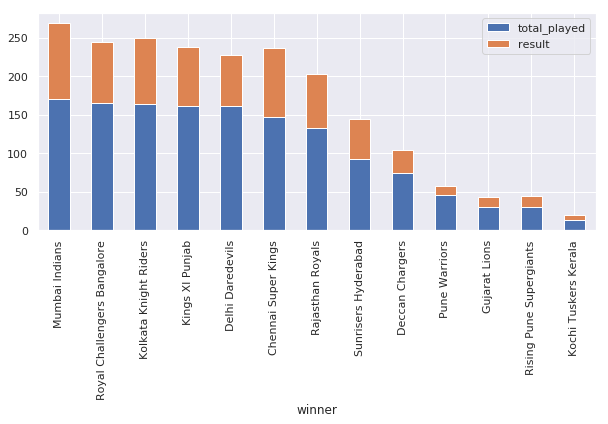

In [185]:
#Comparision between Total matches played and No of matches won by each team 

comparision.plot(kind='bar',stacked=True,figsize=(10,4))

# 8. Each Season winner ?

In [195]:
season_winner = matches_data.groupby('season')['season','winner'].tail(1)
season_winner.sort_values(by='season',ascending=True)

,season,winner
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad
58,2017,Mumbai Indians


# 9.team won max seasons ?

In [199]:
season_winner.groupby('winner').count()

,season
winner,
Chennai Super Kings,3
Deccan Chargers,1
Kolkata Knight Riders,2
Mumbai Indians,3
Rajasthan Royals,1
Sunrisers Hyderabad,1


Chennai Super Kings and Mumbai Indians won 3 seasons each

# 10.Team won by max runs

In [200]:
maximum_runs = matches_data[['season','winner','win_by_runs']].sort_values('win_by_runs',ascending=False)[:5].head(5)
maximum_runs

,season,winner,win_by_runs
43,2017,Mumbai Indians,146
619,2016,Royal Challengers Bangalore,144
59,2008,Kolkata Knight Riders,140
556,2015,Royal Challengers Bangalore,138
410,2013,Royal Challengers Bangalore,130


# 11. Team won by Marginal runs

In [201]:
min_runs = matches_data[matches_data['win_by_runs']==1]
min_runs['winner'].value_counts()

Mumbai Indians                 2
Kings XI Punjab                2
Chennai Super Kings            1
Royal Challengers Bangalore    1
Delhi Daredevils               1
Gujarat Lions                  1
Name: winner, dtype: int64

# 12.Team won by Max wickets

In [203]:
max_wickets = matches_data[matches_data['win_by_wickets']==10]
max_wickets['winner'].value_counts()

Royal Challengers Bangalore    3
Rajasthan Royals               1
Kolkata Knight Riders          1
Delhi Daredevils               1
Chennai Super Kings            1
Mumbai Indians                 1
Deccan Chargers                1
Kings XI Punjab                1
Sunrisers Hyderabad            1
Name: winner, dtype: int64

# 13.Team won by Minimum wickets

In [204]:
max_wickets = matches_data[matches_data['win_by_wickets']==1]
max_wickets['winner'].value_counts()

Chennai Super Kings      1
Kolkata Knight Riders    1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

# 14. Top 10 high performance player

In [205]:
matches_data['player_of_match'].value_counts()[:10]

CH Gayle          20
AB de Villiers    18
RG Sharma         16
YK Pathan         16
DA Warner         15
SK Raina          14
MS Dhoni          14
G Gambhir         13
SR Watson         13
MEK Hussey        12
Name: player_of_match, dtype: int64

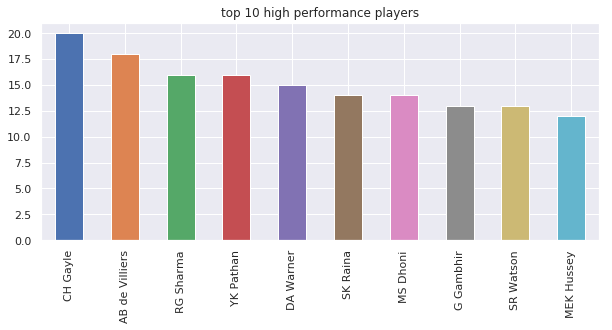

In [207]:
matches_data['player_of_match'].value_counts()[:10].plot(kind='bar',
                   figsize=(10,4),title="top 10 high performance players")

# 15.Toss Decision across matches

In [209]:
toss=matches_data['toss_decision'].value_counts()
toss

field    413
bat      283
Name: toss_decision, dtype: int64

In [210]:
Toss_decision = matches_data.groupby('season')['season','toss_decision'].tail(1)
Toss_decision.sort_values(by='season',ascending=True)

,season,toss_decision
116,2008,field
173,2009,field
233,2010,bat
306,2011,bat
380,2012,bat
456,2013,bat
516,2014,field
575,2015,field
635,2016,bat
58,2017,bat


In [211]:
toss_decision = matches_data.groupby('season')['toss_decision'].value_counts()
toss_decision

season  toss_decision
2008    field            32
        bat              26
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    field            48
        bat              25
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    field            41
        bat              19
2015    field            34
        bat              25
2016    field            49
        bat              11
2017    field            48
        bat              11
2018    field            50
        bat              10
Name: toss_decision, dtype: int64

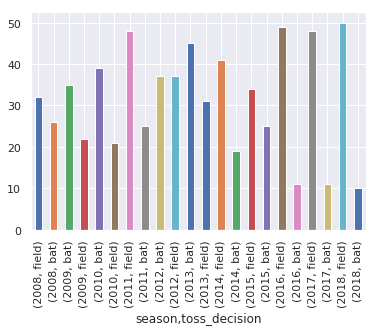

In [213]:
toss_decision = matches_data.groupby('season')['toss_decision'].value_counts()
toss_decision.plot(kind='bar')

# How toss winning affects the match winner

In [215]:
tosswin = matches_data['id'][matches_data['toss_winner'] == matches_data['winner']].count()
tosswin


total_matches = matches_data['id'].count()
total_matches

success_rate = ((matches_data[matches_data['toss_winner'] == matches_data['winner']].count())/(total_matches))*100
success_rate

print("Number of matches in which the toss winner is the game winner is :",tosswin,"out of",total_matches ,
      "and the success rate is",success_rate,"%")

Number of matches in which the toss winner is the game winner is : 357 out of 696 and the success rate is id                 51.293103
season             51.293103
city               51.293103
date               51.293103
team1              51.293103
team2              51.293103
toss_winner        51.293103
toss_decision      51.293103
result             51.293103
dl_applied         51.293103
winner             51.293103
win_by_runs        51.293103
win_by_wickets     51.293103
player_of_match    51.293103
venue              51.293103
umpire1            51.149425
umpire2            51.149425
dtype: float64 %


# Toss Decision in which Toss winner is the game winner 

In [217]:
tosswin_winner = matches_data['toss_decision'][matches_data['toss_winner'] == matches_data['winner']].value_counts()
tosswin_winner

field    228
bat      129
Name: toss_decision, dtype: int64

63.9% of the toss winning teams had decided to field first while 36.1% had decided to Bat first and won the matches.

# Top 10 cities to hold matchs

In [218]:
matches_data['city'].value_counts()[:10].sort_values(ascending=False)

Mumbai        94
Bangalore     73
Kolkata       70
Delhi         67
Hyderabad     56
Chennai       49
Chandigarh    46
Jaipur        40
Pune          38
Durban        15
Name: city, dtype: int64

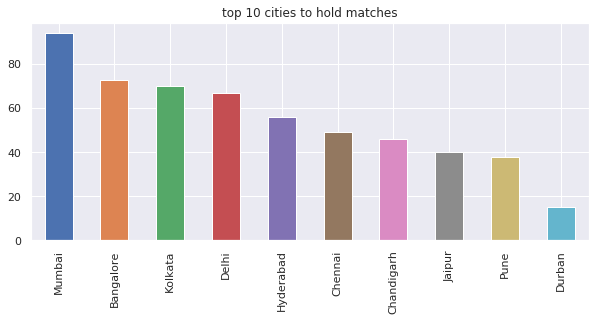

In [220]:
matches_data['city'].value_counts()[:10].sort_values(ascending=False).plot(kind='bar',title="top 10 cities to hold matches",figsize=(10,4))

#  which city does each team has won more matches

In [221]:
a=matches_data.groupby(['winner','city']).size().reset_index(name='win_counts')
a=a.sort_values("win_counts",ascending=False)
a.groupby("winner").head(1)

,winner,city,win_counts
127,Mumbai Indians,Mumbai,48
109,Kolkata Knight Riders,Kolkata,42
4,Chennai Super Kings,Chennai,34
164,Royal Challengers Bangalore,Bangalore,34
149,Rajasthan Royals,Jaipur,29
43,Delhi Daredevils,Delhi,27
189,Sunrisers Hyderabad,Hyderabad,25
74,Kings XI Punjab,Chandigarh,22
161,Rising Pune Supergiants,Pune,5
137,Pune Warriors,Pune,4


# Top 10 Venues to hold the matches 

In [222]:
venue=matches_data.groupby('venue')["id"].count()
venue.sort_values(ascending=False).head(10)

venue
M Chinnaswamy Stadium                         73
Eden Gardens                                  70
Feroz Shah Kotla                              67
Wankhede Stadium                              66
Rajiv Gandhi International Stadium, Uppal     56
MA Chidambaram Stadium, Chepauk               49
Sawai Mansingh Stadium                        40
Punjab Cricket Association Stadium, Mohali    35
Maharashtra Cricket Association Stadium       21
Dr DY Patil Sports Academy                    17
Name: id, dtype: int64

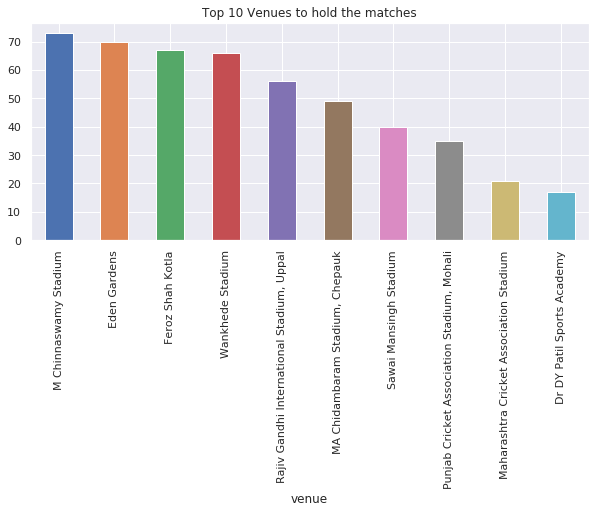

In [224]:
venue=matches_data.groupby('venue')["id"].count()
venue.sort_values(ascending=False).head(10).plot(kind='bar',title='Top 10 Venues to hold the matches'
,figsize=(10,4))

M Chinnaswamy Stadium had hold highest number of matches (73) followed by Eden Gardens (70).

# Conclusion:

On studying from above observed that Mumbai Indians and Chenni Super Kings are the teams who are more likely to win th IPL Season. 

